In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10, size = 100)

def demean(X):
    return X - np.mean(X, axis=0)

X = demean(X)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
def f(w, X):
    return np.sum((X.dot(w)) **2) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w): #将w的模变成1
    return w / np.linalg.norm(w)

def first_component(df, X, initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w +  eta * gradient
        w = direction(w) #每次求一个单位方向向量
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [3]:
initial_w = np.random.random(X.shape[1]) #不能从0开始
eta = 0.001
w = first_component(df, X, initial_w, eta)
w

array([0.76565125, 0.64325591])

In [4]:
X2 = X - X.dot(w).reshape(-1, 1) * w

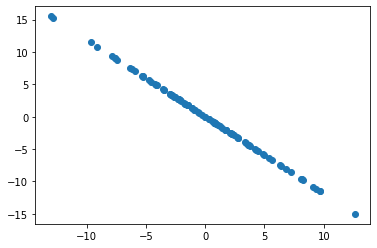

In [5]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [6]:
w2 = first_component(df, X2, initial_w, eta)
w2

array([-0.64323565,  0.76566827])

In [7]:
w.dot(w2) #两者应该是垂直的,结果趋近于0

2.6466262984248257e-05

In [10]:
def first_n_components(n, X, eta = 0.01, n_iters = 1e4, epsilon = 1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(df, X_pca, initial_w, eta)
        res.append(w)
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    return res

In [11]:
first_n_components(2, X)

[array([0.76565167, 0.6432554 ]), array([-0.64325172,  0.76565477])]